
 #Other tasks

 #task1


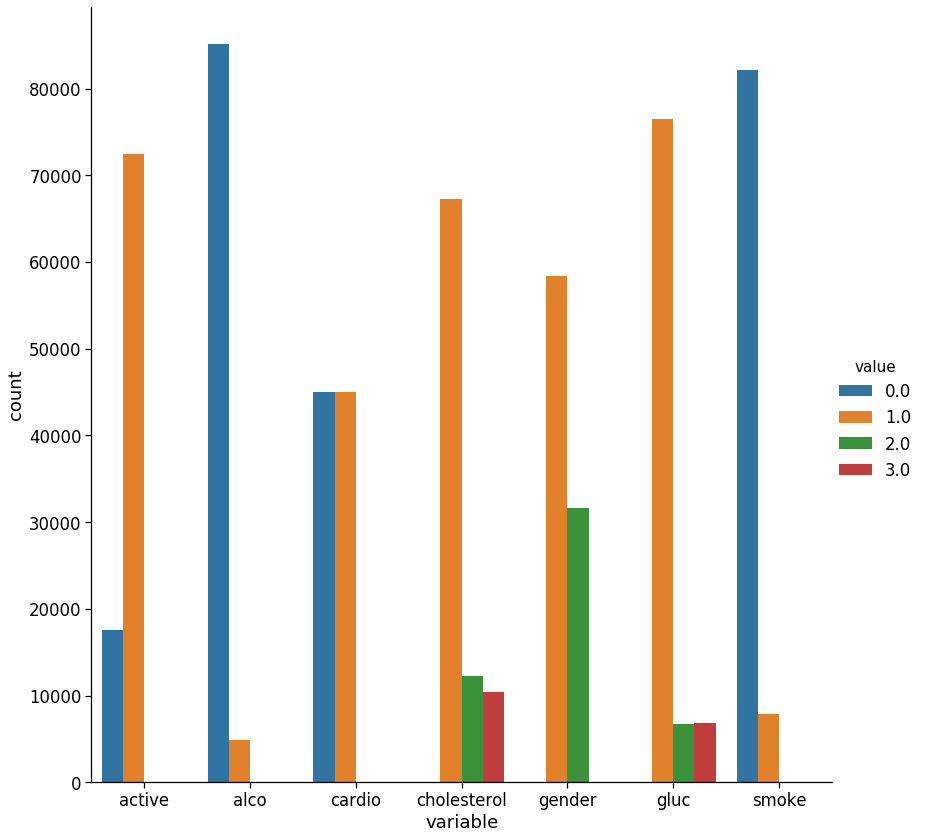

In [0]:
import numpy as np
import pandas as pd
import matplotlib.ticker
import matplotlib.pyplot as plt
import seaborn as sns
import math


import warnings
warnings.filterwarnings("ignore")

#sns.set_context("notebook",font_scale = 1.5,rc = {"figure.figsize" : (12, 9),"axes.titlesize" : 18})

df = pd.read_csv('mlbootcamp5_train.csv', sep=';', index_col='id')

#Other tasks
print("\n #Other tasks")

#task1
print("\n #task1")
df_uniques1 = pd.melt(frame=df, value_vars=['gender','cholesterol','gluc', 'smoke', 'alco','active', 'cardio'])
df_uniques1 = pd.DataFrame(df_uniques1.groupby(['variable','value'])['value'].count())\
.sort_index(level=[0, 1]) \
.rename(columns={'value': 'count'}) \
.reset_index()
sns.factorplot(x='variable', y='count', hue='value', data=df_uniques1, kind='bar', size=12)






 #task2


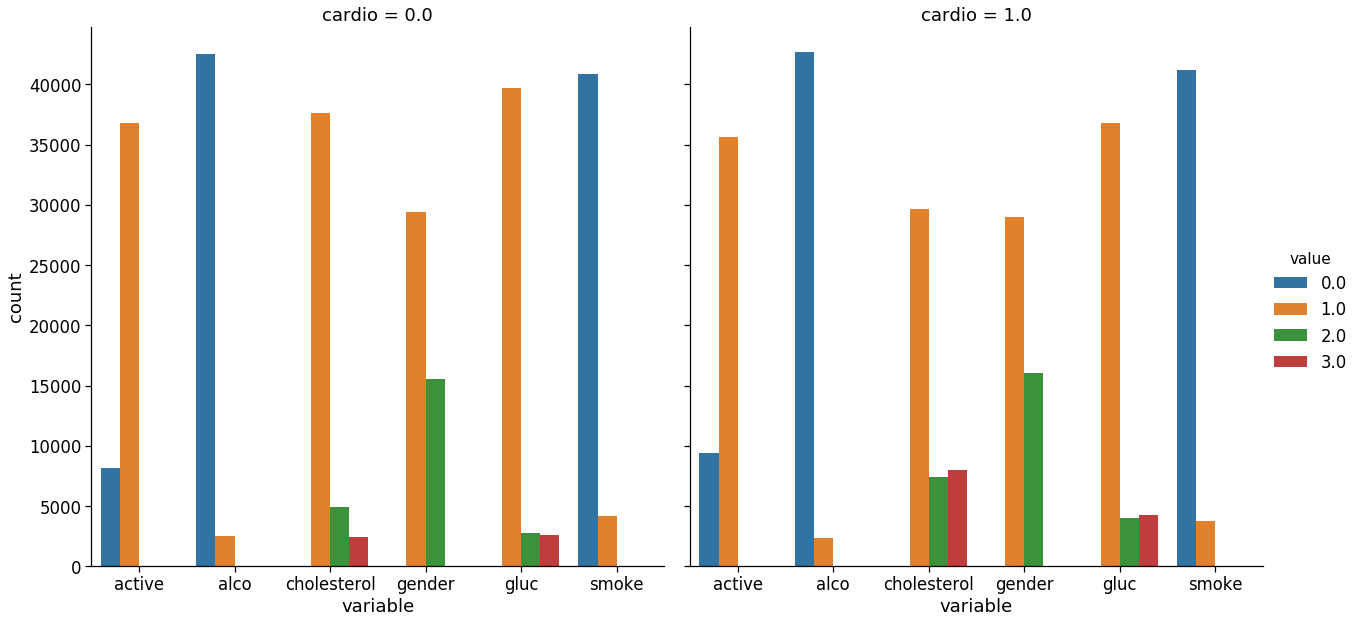

In [0]:

#task2
print("\n #task2")
df_uniques2 = pd.melt(frame=df, value_vars=['gender','cholesterol','gluc','smoke', 'alco','active'],id_vars=['cardio'])
df_uniques2 = pd.DataFrame(df_uniques2.groupby(['variable', 'value','cardio'])['value'].count()) \
.sort_index(level=[0, 1]) \
.rename(columns={'value': 'count'}) \
.reset_index()
sns.factorplot(x='variable', y='count', hue='value', col='cardio', data=df_uniques2, kind='bar', size=9)


In [0]:

#task3
print("\n #task3")
for c in df.columns:
  n = df[c].nunique()
  print(c)
  if n <= 3:
    print(n, sorted(df[c].value_counts().to_dict().items()))
  else:
    print(n)
print(10 * '-')




 #task3
age
8077
gender
2 [(1, 58435), (2, 31605)]
height
110
weight
288
ap_hi
153
ap_lo
157
cholesterol
3 [(1.0, 67293), (2.0, 12289), (3.0, 10456)]
gluc
3 [(1.0, 76474), (2.0, 6708), (3.0, 6856)]
smoke
2 [(0.0, 82107), (1.0, 7931)]
alco
2 [(0.0, 85179), (1.0, 4859)]
active
2 [(0.0, 17617), (1.0, 72421)]
cardio
2 [(0.0, 45013), (1.0, 45025)]
----------



 #Induvidual tasks

 #task1


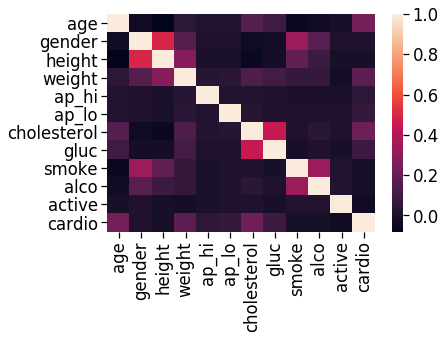

In [0]:

#Induvidual tasks
print("\n #Induvidual tasks")

#task1
print("\n #task1")
#sns.pairplot(data)
corr = df.corr()
corr = round(corr, 2)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=False)


 #task2.1


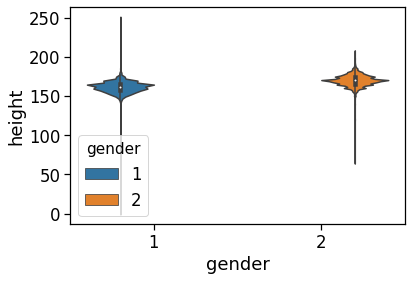

In [0]:

#task2.1
print("\n #task2.1")
fig, axes = plt.subplots()
df_uniques3 = pd.melt(frame=df, id_vars=['gender', 'height'])
sns.violinplot('gender', 'height', data=df_uniques3, ax=axes,hue='gender',scale='count')




 #task2.2


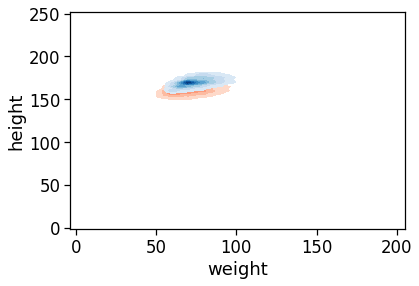

In [0]:

#task2.2
print("\n #task2.2")
g1 = df[df["gender"] == 1]
g2 = df[df["gender"] == 2]
sns.kdeplot(g1['weight'], g1['height'], cmap="Reds", shade=True, shade_lowest=False)
sns.kdeplot(g2['weight'], g2['height'], cmap="Blues", shade=True, shade_lowest=False)




In [0]:


#task3
print("\n #task3")
data = df.drop(df[(df['ap_lo'] <= 0) | (df['ap_hi'] <= 0)].index)
corr = data.corr(method='spearman')



 #task3



 #task4


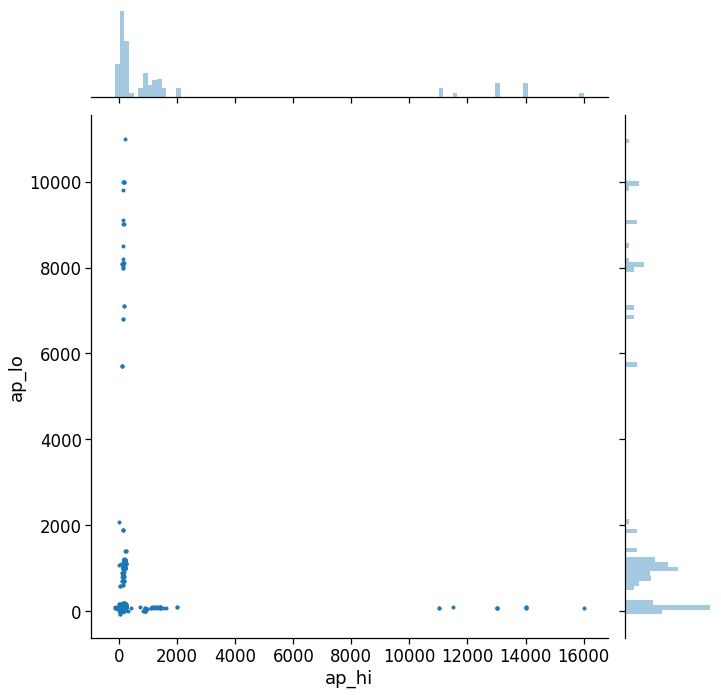

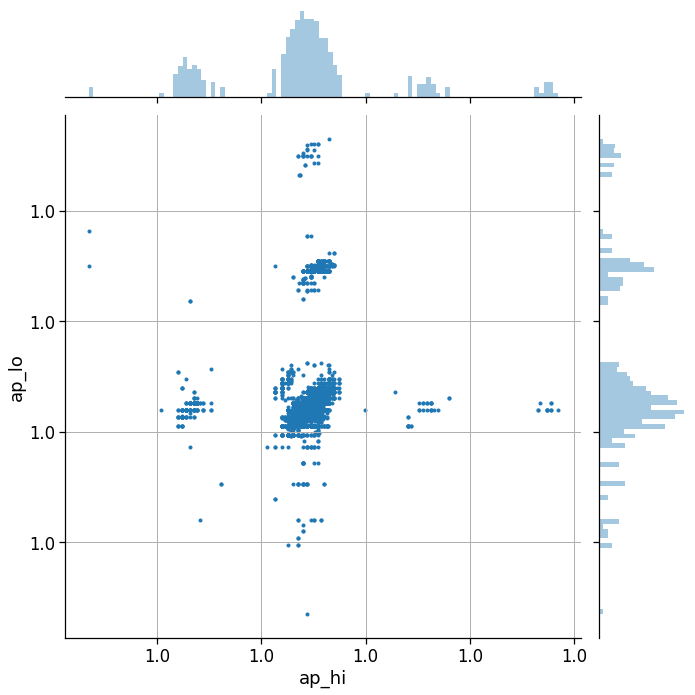

In [0]:

#task4
print("\n #task4")
sns.jointplot(df['ap_hi'],df['ap_lo'],size=10,marker='.',marginal_kws=dict(bins=100, rug=False, hist_kws={'log': True}))

data_filtered = df[(df['ap_hi'] > 0) & (df['ap_lo'] > 0)][['ap_lo', 'ap_hi']].apply(np.log1p)
data_filtered.describe()

g = sns.jointplot(data_filtered['ap_hi'],data_filtered['ap_lo'],size=10,stat_func=None,marginal_kws=dict(bins=100, rug=False,hist_kws={'log': True}),marker='.')

g.ax_joint.grid(True)

g.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos:str(round(np.exp(x / 10000), 2))))

g.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, pos:str(round(np.exp(y / 10000), 2))))




 #task5


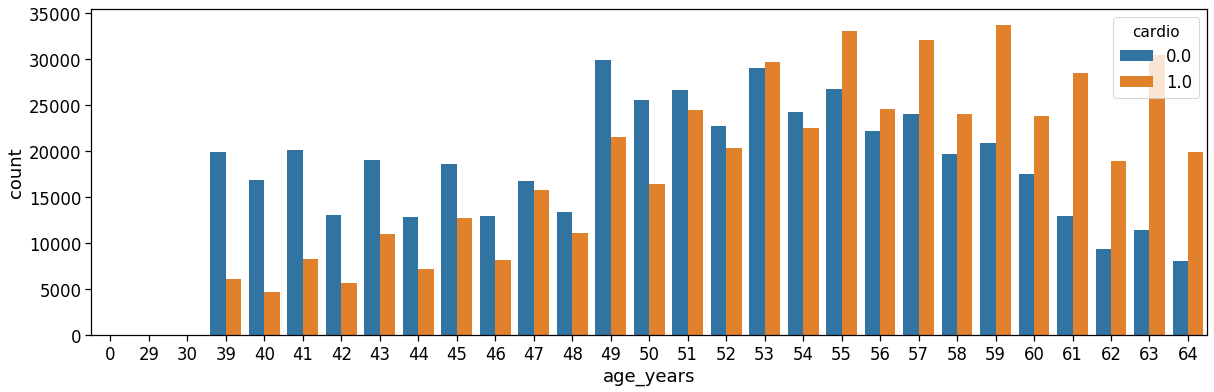

In [0]:

#task5
print("\n #task5")
df['age_years'] = (df['age'] // 365.25).astype(int)
df_uniques4 = pd.melt(frame=df, id_vars=['age_years', 'cardio'])
plt.figure(figsize=(20, 6))
ax = sns.countplot(x="age_years", hue="cardio", data=df_uniques4)



 #ind task


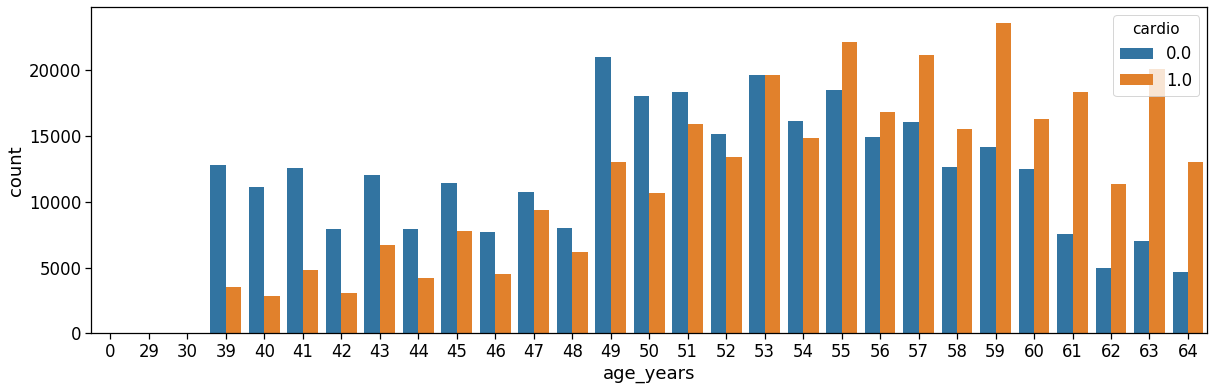

In [0]:
#ind task
print("\n #ind task")
plt.figure(figsize=(20, 6))
g1 = df[df["gender"] == 1]
df_uniques5 = pd.melt(frame=g1, id_vars=['age_years', 'cardio'])
ax = sns.countplot(x="age_years", hue="cardio", data=df_uniques5)

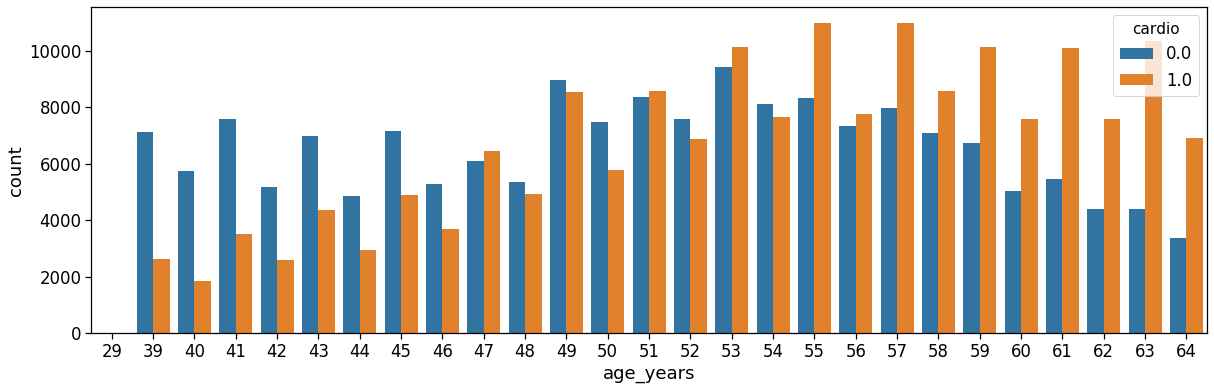

In [0]:
g1 = df[df["gender"] == 1]
plt.figure(figsize=(20, 6))
df_uniques6 = pd.melt(frame=g2, id_vars=['age_years', 'cardio'])
ax2 = sns.countplot(x="age_years", hue="cardio", data=df_uniques6)